# Case Study #10
<hr>

In [142]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score

## 1. Examining the Dataset

In [143]:
# reading the dataset
mushroom_df = pd.read_csv('Datasets/mushrooms.csv')
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Now let us examine the dataset.

In [144]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [145]:
rows, columns = mushroom_df.shape
print(f'No. of features / columns: {columns}')
print(f'No. of rows: {rows}')

No. of features / columns: 23
No. of rows: 8124


Let us see which all columns are there in the dataset along with there datatype.

In [146]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Here we can see that there are no quantitative columns. Every columns are of type object.

Now, let us look into the values of each columns:

In [147]:
column_details = pd.DataFrame({'Feature': [column for column in mushroom_df.columns], 'Unique Values': [mushroom_df[column].unique() for column in mushroom_df.columns]})
column_details.style.set_properties(**{'text-align': 'left'})

,Feature,Unique Values
0,class,['p' 'e']
1,cap-shape,['x' 'b' 's' 'f' 'k' 'c']
2,cap-surface,['s' 'y' 'f' 'g']
3,cap-color,['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
4,bruises,['t' 'f']
5,odor,['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
6,gill-attachment,['f' 'a']
7,gill-spacing,['c' 'w']
8,gill-size,['n' 'b']
9,gill-color,['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


From the above table we can see that the feature "**veil-type**" has just one value 'p'. So we can remove that column.

In [148]:
mushroom_df.drop(['veil-type'], axis=1, inplace=True)

Also, the feature "**stalk-root**"" has an unknown value '?'.

In [149]:
mushroom_df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

We will be keeping that value as it is, since we will encode the data before the classification process.

For the classification problem, the target variable is class. Let us check it's values.

In [150]:
mushroom_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

So, there are 4208 edible samples and 3916 poisonous samples.

Now, before we move further let us check whether there are any missing values in our dataset.

In [151]:
mushroom_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in our dataset. So, we are good to go!

## 2. Encoding the Dataset

The data is categorical so we’ll use LabelEncoder to convert it to ordinal. LabelEncoder converts each value in a column to a number.

The LabelEncoder requires all features to be Categorical. From the df.info() method we saw that all our features are of _"object"_ datatype, so we have to change it's type to _"category"_.

In [152]:
mushroom_df = mushroom_df.astype('category')
mushroom_df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

Now, all our columns are of type _"category"_. We can now use the LabelEncoder.

In [153]:
labelencoder = LabelEncoder()
for column in mushroom_df.columns:
    mushroom_df[column] = labelencoder.fit_transform(mushroom_df[column])

Checking the dataset again:

In [154]:
mushroom_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Now, let's look at the correlation between the features:

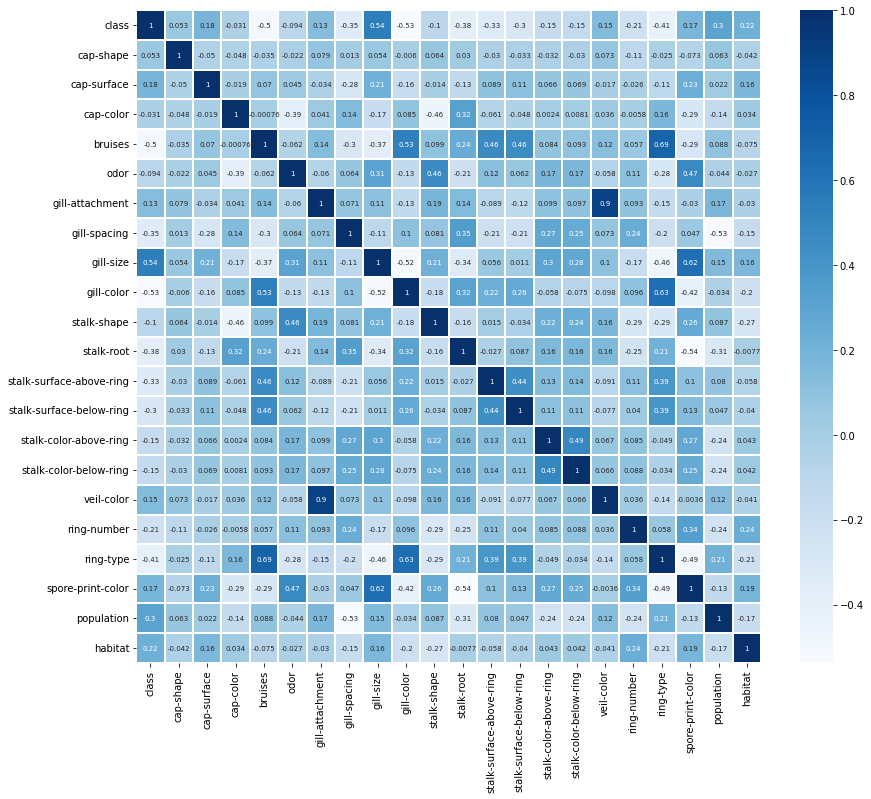

In [155]:
plt.figure(figsize=(14,12))
sns.heatmap(mushroom_df.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.show()

## 3. Splitting the Dataset

Let us 1st split our data set into independent and target variables.

In [156]:
X = mushroom_df.drop(['class'], axis=1)
y = mushroom_df['class']
X.head(1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5


In [157]:
y.head(1)

0    1
Name: class, dtype: int32

Now, let's split into train and test dataset

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## 4. Classification
<hr>

### 4.1 Logistic Regression
<hr>

In [159]:
from sklearn.linear_model import LogisticRegression

# creating LogisticRegression model
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print(f'Test Accuracy: {round(lr.score(X_test, y_test)*100,2)}%')

Test Accuracy: 94.77%


In [160]:
y_pred_lr = lr.predict(X_test)

print(f'Logistic Regression Classifier Report: \n{classification_report(y_test, y_pred_lr)}')

Logistic Regression Classifier Report: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



Confusion Matrix for Logistic Regression Classifier:

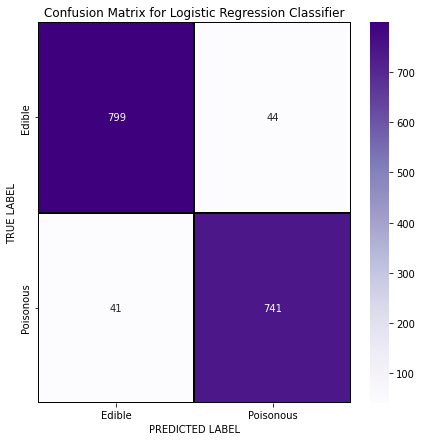

In [161]:
cm = confusion_matrix(y_test, y_pred_lr)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### 4.2 KNN Classification
<hr>

In [162]:
from sklearn.neighbors import KNeighborsClassifier

best_Kvalue = 0
best_score = 0

# Checking the best k value for knn
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [163]:
# Creating knn classifier with best K value
knn = KNeighborsClassifier(n_neighbors=best_Kvalue)
knn.fit(X_train, y_train)

# predicting for X_test
y_pred_knn = knn.predict(X_test)

# generating classification report
print(f'KNN Classifier report: \n\n {classification_report(y_test, y_pred_knn)}')

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Confusion Matrix for Logistic Regression Classifier:

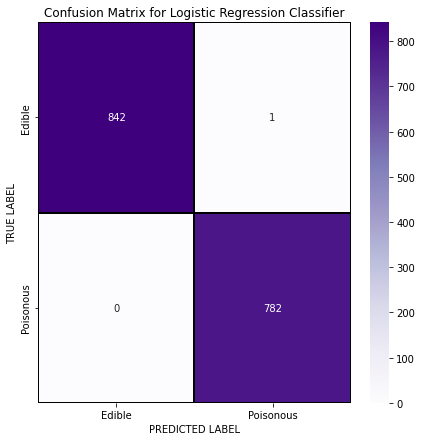

In [164]:
cm = confusion_matrix(y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### 4.3 Random Forest Classification
<hr>

In [165]:
from sklearn.ensemble import RandomForestClassifier

# creating random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'Test Accuracy: {round(rf.score(X_test, y_test)*100, 2)}%')

Test Accuracy: 100.0%


In [166]:
# predicting for x_test using random forest
y_pred_rf = rf.predict(X_test)
print(f'Random Forest Classifier Report: \n\n{classification_report(y_test, y_pred_rf)}')

Random Forest Classifier Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Confusion matrix for Random Forest Classifier

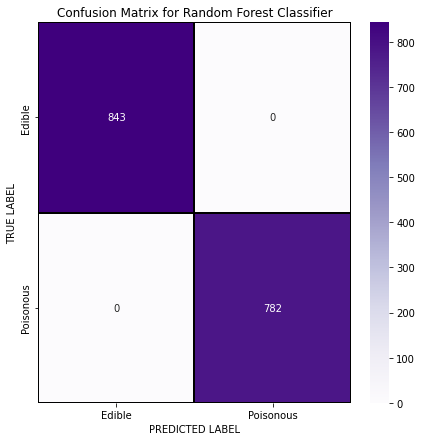

In [167]:
cm = confusion_matrix(y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

###  4.4 SVM Classifier
<hr>

In [170]:
from sklearn.svm import SVC

# creating SVM classifier
svm = SVC()
svm.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))

Test Accuracy: 99.38%


In [171]:
# predicting for X_test using svm classifier
y_pred_svm = svm.predict(X_test)

# generating classifier report
print(f'SVM Classifier Report: \n\n{classification_report(y_test, y_pred_svm)}')

SVM Classifier Report: 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Confusion matrix for SVM Classifier:

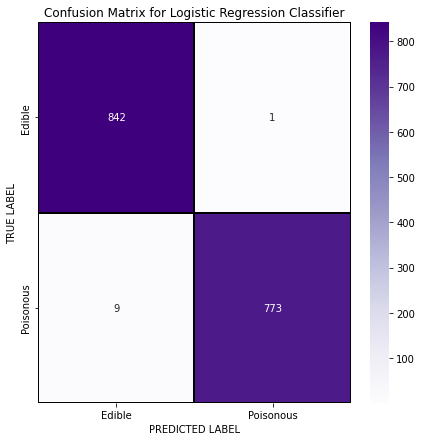

In [172]:
cm = confusion_matrix(y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### 4.5 Decision Tree Classifier
<hr>

In [173]:
from sklearn.tree import DecisionTreeClassifier

# creating Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))

Test Accuracy: 100.0%


In [174]:
# predicting for X_test
y_pred_dt = dt.predict(X_test)

# generating classifier report
print(f'Decision Tree Classifier Report: \n\n{classification_report(y_test, y_pred_dt)}')

Decision Tree Classifier Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Confusion Matrix for Decision Tree Classifier:

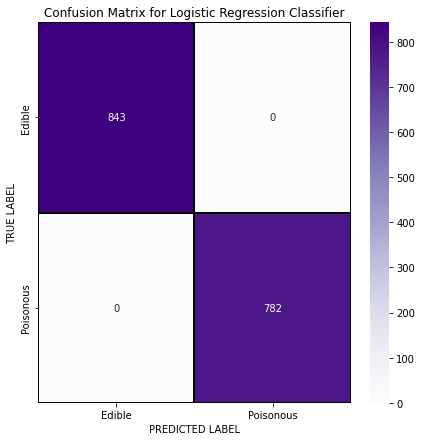

In [175]:
cm = confusion_matrix(y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### 4.6 Naive Bayes Classification
<hr>

In [176]:
from sklearn.naive_bayes import GaussianNB

# creating GaussianNB classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
print(f'Test Accuracy: {round(nb.score(X_test, y_test)*100, 2)}%')

Test Accuracy: 92.18%


In [177]:
# predicting for X_test
y_pred_nb = nb.predict(X_test)

# generating GaussianNB classifier report
print(f'Gaussian Naive Bayes Classification Report: \n\n{classification_report(y_test, y_pred_nb)}')

Gaussian Naive Bayes Classification Report: 

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



Confusion Matrix for Gaussian NB Classifier:

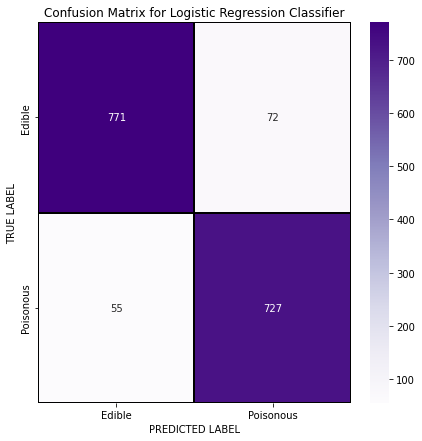

In [178]:
cm = confusion_matrix(y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

## Conclusion
<hr>

The given Wine dataset is of good quality as we were able to get 90+ accuracy for most of the classifiers.
- For KNN, Random Forest and Decision Tree we got 100% accuracy
- SVM 99% accuracy
- Logistic Regression - 95% accuracy
- Gaussian Naive Bayes - 92% accuracy